In [3]:
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from RegscorePy import *
from collections import OrderedDict

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [4]:
def combine_deep_smf(low_r,ssfq, affix,z):
    smf1,count1 = np.load(path+'smf_'+low_r+'_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2,count2 = np.load(path+'smf_'+low_r+'_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3,count3 = np.load(path+'smf_'+low_r+'_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4,count4 = np.load(path+'smf_'+low_r+'_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf5,count5 = np.load(path+'smf_'+low_r+'_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return (smf1+smf2+smf3+smf4+smf5)/(count1+count2+count3+count4+count5)

## Stellar Mass Function of Satellites



In [3]:
# schecter function
def schechter(m,phi,m_s,alpha_s):
    m=10**(m-7)
    return phi*(m/m_s)**(alpha_s+1)*np.exp(-((m/m_s)**2))

# fitting schecter function
def fit_schechter(xdata, ydata, ydata_err, start,end):
    popt,pcov = curve_fit(schechter, xdata[start-1:end], ydata[start-1:end], sigma=ydata_err[start-1:end],p0=[1.645e+03,3.918e+03,-1.048])
    
    res = ydata - schechter(xdata, *popt)
    chi2 = sum((res / ydata_err) ** 2)
    return popt,pcov,chi2

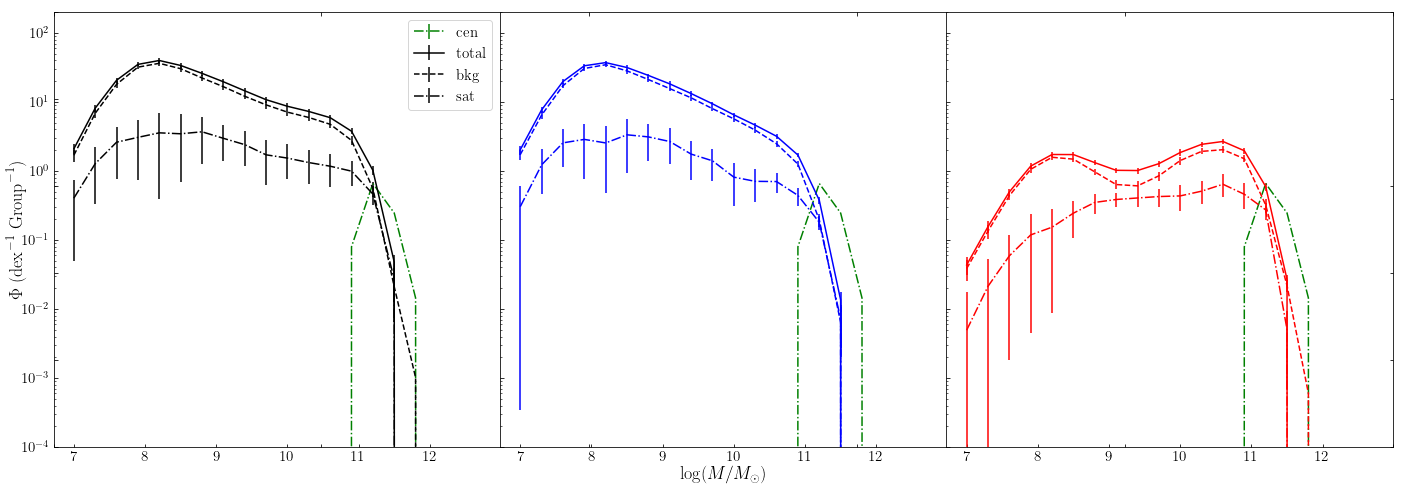

In [4]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,8))

path = 'CUT_deep_catalogs/test_smf_results/test_smf_new_cat/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

z=0.4
low_r='0.0'
high_r='0.7'

#load data
all_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_total.npy')
all_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_bkg.npy')
all_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_sat.npy')
all_cen = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_cen.npy')

sf_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_total.npy')
sf_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_bkg.npy')
sf_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_sat.npy')

q_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_total.npy')
q_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_bkg.npy')
q_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_sat.npy')

axs[0].errorbar(bin_edges, all_cen[0]/all_cen[-1],yerr=0,fmt='-.g',label='cen')
axs[1].errorbar(bin_edges, all_cen[0]/all_cen[-1],yerr=0,fmt='-.g',label='cen')
axs[2].errorbar(bin_edges, all_cen[0]/all_cen[-1],yerr=0,fmt='-.g',label='cen')

# all
# error=0
error = [(all_total[0]-all_total[1])/all_total[-1], (all_total[2]-all_total[0])/all_total[-1]]
axs[0].errorbar(bin_edges, all_total[0]/all_total[-1],yerr=error,fmt='k',label='total')
axs[0].errorbar(bin_edges, all_bkg[0]/all_bkg[-1],yerr=error,fmt='--k',label='bkg')
axs[0].errorbar(bin_edges, all_sat[0]/all_sat[-1],yerr=error,fmt='-.k',label='sat')

#sf
# error_sf=0
error_sf = [(sf_total[0]-sf_total[1])/sf_total[-1], (sf_total[2]-sf_total[0])/sf_total[-1]]
axs[1].errorbar(bin_edges, sf_total[0]/sf_total[-1],yerr=error_sf,fmt='b')
axs[1].errorbar(bin_edges, sf_bkg[0]/sf_bkg[-1],yerr=error_sf,fmt='--b')
axs[1].errorbar(bin_edges, sf_sat[0]/sf_sat[-1],yerr=error_sf,fmt='-.b')

#q
# error_q=0
error_q = [(q_total[0]-q_total[1])/q_total[-1], (q_total[2]-q_total[0])/q_total[-1]]
axs[2].errorbar(bin_edges, q_total[0]/q_total[-1],yerr=error_q,fmt='r')
axs[2].errorbar(bin_edges, q_bkg[0]/q_bkg[-1],yerr=error_q,fmt='--r')
axs[2].errorbar(bin_edges, q_sat[0]/q_sat[-1],yerr=error_q,fmt='-.r')

axs[0].set_yscale('log')
axs[0].set_ylim([1e-4,2e2])
axs[0].legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel(r'$\log(M/M_\odot)$', fontsize=18)
plt.ylabel(r'$\Phi~ (\mathrm{dex}^{-1} ~\mathrm{Group}^{-1})$', fontsize=18)
plt.savefig('figures/smf_total_bkg_sat_'+str(z)+'.png')
plt.show()

In [ ]:

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)

path = 'CUT_deep_catalogs/total_sample/'
count_radial_4 = combine_deep('all','all','9.5','13.0',0.4,path)
count_radial_6 = combine_deep('all','all','9.5','13.0',0.6,path)
count_radial_8 = combine_deep('all','all','9.5','13.0',0.8,path)
bin_edges = np.load(path+'bin_centers.npy')

power_law_model = pm.Model()

X = np.log10(bin_edges[3:])
Y = np.log10(count_radial_4[0][3:])

print(X)
print(Y)
with power_law_model: 
    # Priors for unknown model parameters
    a = pm.Normal('a', mu=-1, sd=0.2)
    I = pm.Normal('I', mu=0.001, sd=1)
    sigma = pm.HalfNormal('sigma', sd=2)

    # Expected value of outcome
    mu = I+a*X

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

map_estimate = pm.find_MAP(model=power_law_model)
print('a',map_estimate['a'])
print('I',map_estimate['I'])

a_best = map_estimate['a']
I_best = map_estimate['I']

with power_law_model:
    # draw 500 posterior samples
    step = pm.Slice()
    trace = pm.sample(5000,step=step)

In [263]:
def log_likelihood(theta, x, y, yerr):
    phi,m_s,alpha_s = theta
    model = schechter(x, phi,m_s,alpha_s)
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    phi,m_s,alpha_s = theta
    if 0 < phi < np.inf and 0.0 < m_s < 13.0 and -10.0 < alpha_s < 10.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [320]:
# maximum likelihood

import emcee
from scipy.optimize import minimize

x = np.array(bin_edges)
y = np.array(all_total[0]/all_total[-1])
yerr = np.array(np.diff(error,axis=0)/2)[0]
yerr[yerr==0.0] = 0.00001

nll = lambda *args: -log_likelihood(*args) # Negative Log-Likelihood
initial = np.array([10, 11, -2]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
phi_ml,m_s_ml,alpha_s_ml = soln.x

pos = soln.x + 2*np.random.randn(1000, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 50000, progress=True)
print(soln.x)

  0%|          | 0/50000 [00:00<?, ?it/s]/Users/lejay/anaconda3/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 50000/50000 [05:27<00:00, 152.55it/s]

[ 1.858e+00  1.364e+04 -1.454e+00]


In [321]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
np.log10(13644.584+1.87)

4.135019815603931

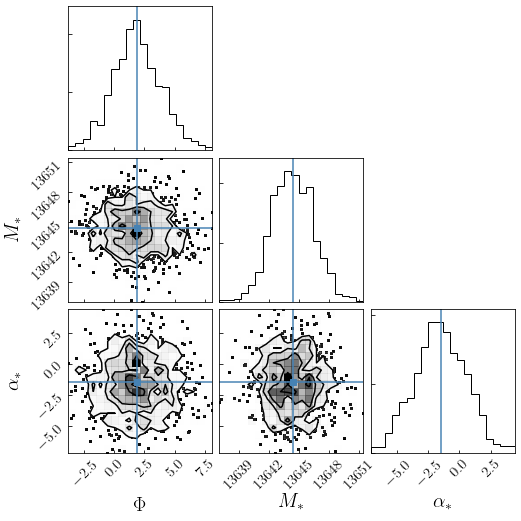

In [322]:
import corner
from matplotlib import rcParams
rcParams["font.size"] = 20
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)


labels = [r"$\Phi$", r"$M_*$", r"$\alpha_*$"]
fig = corner.corner(
    flat_samples, labels=labels, truths=[phi_ml, m_s_ml, alpha_s_ml]
);

### relative mass scale

[array([44489., 41877., 37510., 31352., 24998., 19546., 15727., 12320.,
        9805.,  8336.,  6798.,  5679.,  4751.,  4054.,  3464.,  3075.,
        2434.,  1773.,  1048.,   498.])
 array([44489., 41877., 37510., 31352., 24998., 19546., 15727., 12320.,
        9805.,  8336.,  6798.,  5679.,  4751.,  4054.,  3464.,  3075.,
        2434.,  1773.,  1048.,   498.])
 array([44489., 41877., 37510., 31352., 24998., 19546., 15727., 12320.,
        9805.,  8336.,  6798.,  5679.,  4751.,  4054.,  3464.,  3075.,
        2434.,  1773.,  1048.,   498.])
 1165]


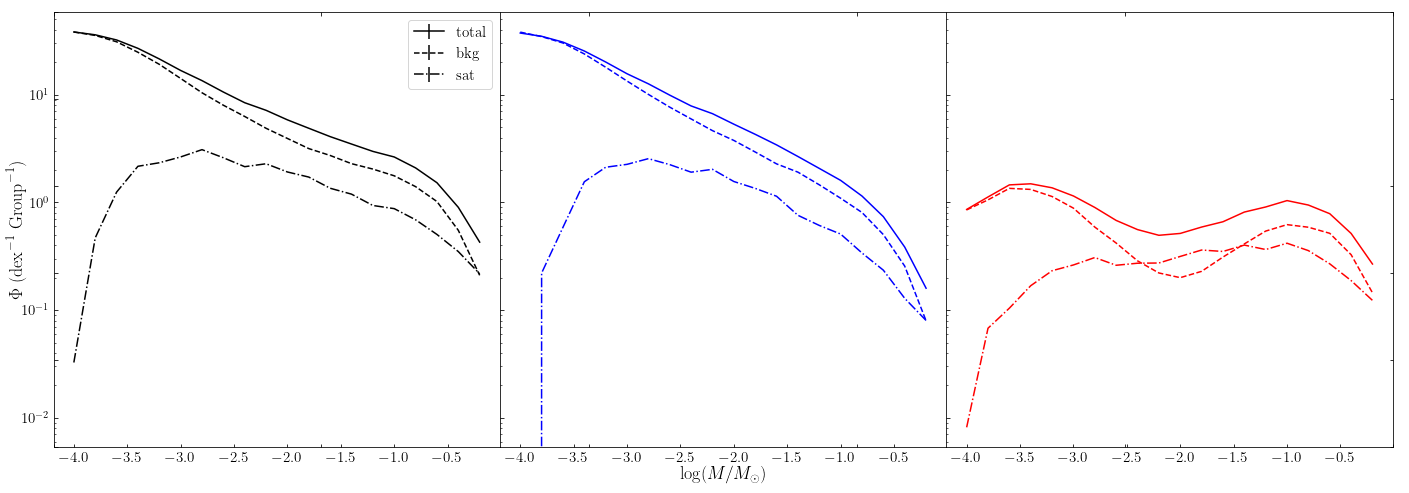

In [334]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,8))

path = 'CUT_deep_catalogs/test_smf_results/test_smf_rel/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

z=0.4
low_r='0.0'
high_r='0.5'

#load data
all_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_total.npy')
all_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_bkg.npy')
all_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_sat.npy')

sf_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_total.npy')
sf_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_bkg.npy')
sf_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_sat.npy')

q_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_total.npy')
q_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_bkg.npy')
q_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_sat.npy')

# all
# error=0
error = [(all_total[0]-all_total[1])/all_total[-1], (all_total[2]-all_total[0])/all_total[-1]]
axs[0].errorbar(bin_edges, all_total[0]/all_total[-1],yerr=error,fmt='k',label='total')
axs[0].errorbar(bin_edges, all_bkg[0]/all_bkg[-1],yerr=error,fmt='--k',label='bkg')
axs[0].errorbar(bin_edges, all_sat[0]/all_sat[-1],yerr=error,fmt='-.k',label='sat')

#sf
# error_sf=0
error_sf = [(sf_total[0]-sf_total[1])/sf_total[-1], (sf_total[2]-sf_total[0])/sf_total[-1]]
axs[1].errorbar(bin_edges, sf_total[0]/sf_total[-1],yerr=error_sf,fmt='b')
axs[1].errorbar(bin_edges, sf_bkg[0]/sf_bkg[-1],yerr=error_sf,fmt='--b')
axs[1].errorbar(bin_edges, sf_sat[0]/sf_sat[-1],yerr=error_sf,fmt='-.b')

#q
# error_q=0
error_q = [(q_total[0]-q_total[1])/q_total[-1], (q_total[2]-q_total[0])/q_total[-1]]
axs[2].errorbar(bin_edges, q_total[0]/q_total[-1],yerr=error_q,fmt='r')
axs[2].errorbar(bin_edges, q_bkg[0]/q_bkg[-1],yerr=error_q,fmt='--r')
axs[2].errorbar(bin_edges, q_sat[0]/q_sat[-1],yerr=error_q,fmt='-.r')

axs[0].set_yscale('log')
# axs[0].set_ylim([1e-4,2e2])
axs[0].legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel(r'$\log(M/M_\odot)$', fontsize=18)
plt.ylabel(r'$\Phi~ (\mathrm{dex}^{-1} ~\mathrm{Group}^{-1})$', fontsize=18)
plt.savefig('figures/smf_total_bkg_sat_'+str(z)+'.png')
plt.show()

[ 1.171e+00  1.704e+04 -1.241e+00]


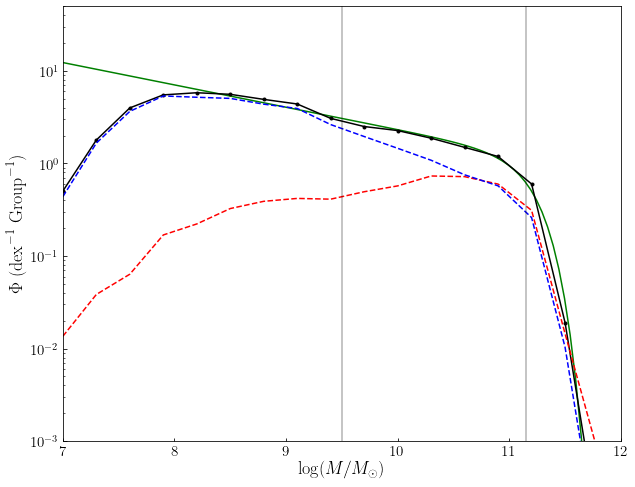

In [62]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,8))
fit_m = np.linspace(7,12,num=100)
path = 'CUT_deep_catalogs/test_smf_results/test_smf_new_cat/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

z=0.4
low_r='0.0'
high_r='0.7'

all_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_sat.npy')
sf_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_sat.npy')
q_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_sat.npy')

popt,pcov,chi2=fit_schechter(bin_edges,all_sat[0]/all_sat[-1],np.sqrt(abs(all_sat[0]+0.0001)),start=5,end=-3)
plt.plot(fit_m,schechter(fit_m,popt[0],popt[1],popt[2]),'g')
print(popt)

plt.plot(bin_edges, all_sat[0]/all_sat[-1],'.-k',label='total')
plt.plot(bin_edges, q_sat[0]/all_sat[-1],'--r',label='q')
plt.plot(bin_edges, sf_sat[0]/all_sat[-1],'--b',label='sf')

plt.plot([11.15,11.15],[1e-5,1e2],'k',alpha=0.3)
plt.plot([9.5,9.5],[1e-5,1e2],'k',alpha=0.3)
plt.ylim([1e-3,5e1])
plt.xlim([7,12])
plt.yscale('log')

plt.xlabel(r'$\log(M/M_\odot)$', fontsize=18)
plt.ylabel(r'$\Phi~ (\mathrm{dex}^{-1} ~\mathrm{Group}^{-1})$', fontsize=18)
plt.savefig('figures/smf_sat_'+str(z)+'.png')

bkg num 356745.0 (206.69) sat num 53058.0 (30.74) ratio 6.724
bkg num 517050.0 (256.35) sat num 38686.0 (19.18) ratio 13.365
bkg num 723997.0 (297.94) sat num 51303.0 (21.11) ratio 14.112


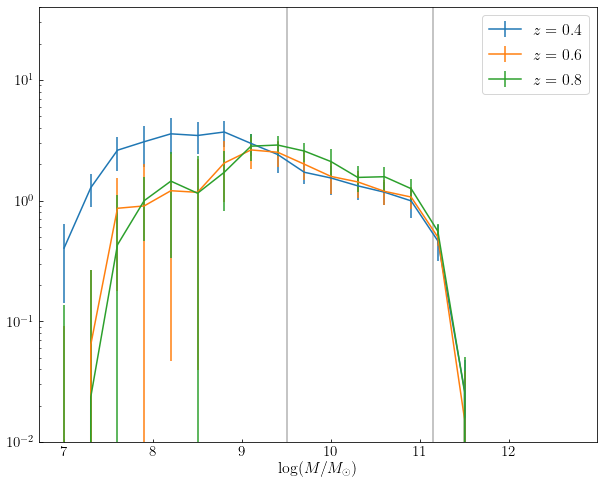

In [5]:
# z dependence 

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,8))
fit_m = np.linspace(7,12,num=100)
path = 'CUT_deep_catalogs/test_smf_results/test_smf_new_cat/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

low_r='0.0'
high_r='0.7'

all_sat4 = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_0.4_sat.npy')
all_sat6 = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_0.6_sat.npy')
all_sat8 = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_0.8_sat.npy')

bkg_sat4 = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_0.4_bkg.npy')
bkg_sat6 = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_0.6_bkg.npy')
bkg_sat8 = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_0.8_bkg.npy')

print('bkg num',round(sum(bkg_sat4[0])),'('+str(round(sum(bkg_sat4[0])/bkg_sat4[-1],2))+')',
      'sat num',round(sum(all_sat4[0])),'('+str(round(sum(all_sat4[0])/all_sat4[-1],2))+')',
      'ratio',round(sum(bkg_sat4[0])/sum(all_sat4[0]),3))

print('bkg num',round(sum(bkg_sat6[0])),'('+str(round(sum(bkg_sat6[0])/bkg_sat6[-1],2))+')',
      'sat num',round(sum(all_sat6[0])),'('+str(round(sum(all_sat6[0])/all_sat6[-1],2))+')',
      'ratio',round(sum(bkg_sat6[0])/sum(all_sat6[0]),3))

print('bkg num',round(sum(bkg_sat8[0])),'('+str(round(sum(bkg_sat8[0])/bkg_sat8[-1],2))+')',
      'sat num',round(sum(all_sat8[0])),'('+str(round(sum(all_sat8[0])/all_sat8[-1],2))+')',
      'ratio',round(sum(bkg_sat8[0])/sum(all_sat8[0]),3))

plt.errorbar(bin_edges, all_sat4[0]/all_sat4[-1],
             yerr=[(all_sat4[0]-all_sat4[1])/all_sat4[-1], (all_sat4[2]-all_sat4[0])/all_sat4[-1]],
             label=r'$z=0.4$')
plt.errorbar(bin_edges, all_sat6[0]/all_sat6[-1],
             yerr=[(all_sat6[0]-all_sat6[1])/all_sat6[-1], (all_sat6[2]-all_sat6[0])/all_sat6[-1]],
             label=r'$z=0.6$')
plt.errorbar(bin_edges, all_sat8[0]/all_sat8[-1],
             yerr=[(all_sat8[0]-all_sat8[1])/all_sat8[-1], (all_sat8[2]-all_sat8[0])/all_sat8[-1]],
             label=r'$z=0.8$')

plt.plot([11.15,11.15],[1e-5,1e2],'k',alpha=0.3)
plt.plot([9.5,9.5],[1e-5,1e2],'k',alpha=0.3)
plt.ylim([1e-2,4e1])
plt.yscale('log')

plt.legend(fontsize=16)
plt.xlabel(r'$\log(M/M_\odot)$', fontsize=16)
plt.savefig('figures/smf_sat_z_dependence'+'.png')


## Completeness Curve

In [7]:
import matplotlib

masscut_low = '9.0'
masscut_high = '9.5'
path = 'completeness_curve/curves/'
comp_all_50 = np.genfromtxt(path+'comp_bootstrap_all_0.6_'+masscut_low+'_'+masscut_high+'.txt')
comp_sf_50 = np.genfromtxt(path+'comp_bootstrap_ssf_0.6_'+masscut_low+'_'+masscut_high+'.txt')
comp_q_50 = np.genfromtxt(path+'comp_bootstrap_sq_0.6_'+masscut_low+'_'+masscut_high+'.txt')
bin_edges = np.load(path+'bin_edges.npy')[:-1]

comp_all = np.median(comp_all_50, axis=0)
comp_all_l = np.percentile(comp_all_50,16, axis=0)
comp_all_h = np.percentile(comp_all_50,84, axis=0)

comp_sf = np.median(comp_sf_50, axis=0)
comp_sf_l = np.percentile(comp_sf_50,16, axis=0)
comp_sf_h = np.percentile(comp_sf_50,84, axis=0)

comp_q = np.median(comp_q_50, axis=0)
comp_q_l = np.percentile(comp_q_50,16, axis=0)
comp_q_h = np.percentile(comp_q_50,84, axis=0)

np.save(path+'comp_bootstrap_all_0.6_'+masscut_low+'_'+masscut_high+'_median',comp_all)
np.save(path+'comp_bootstrap_ssf_0.6_'+masscut_low+'_'+masscut_high+'_median',comp_sf)
np.save(path+'comp_bootstrap_sq_0.6_'+masscut_low+'_'+masscut_high+'_median',comp_q)

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))
axs.plot(bin_edges,comp_all,'k',label='all')
axs.fill_between(bin_edges,comp_all_l,comp_all_h,color='k',alpha=0.2)

axs.plot(bin_edges,comp_sf,'b',label='sf')
axs.fill_between(bin_edges,comp_sf_l,comp_sf_h,color='b',alpha=0.2)

axs.plot(bin_edges,comp_q,'r',label='q')
axs.fill_between(bin_edges,comp_q_l,comp_q_h,color='r',alpha=0.2)

axs.annotate('z~0.6',(5,10), fontsize=14, xycoords='axes points')
axs.annotate(masscut_low+'<M<'+masscut_high,(5,25), fontsize=14, xycoords='axes points')

axs.set_xticks([20, 100, 400])
axs.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

axs.legend(fontsize=15,loc='lower right')
axs.set_ylim([0,1])
axs.set_xlim([10,520])
axs.set_xscale('log')
axs.set_xlabel('Projected Distance [kpc]',fontsize=15)
axs.set_ylabel('Completeness',fontsize=15)

plt.savefig('figures/completeness_0.6_'+masscut_low+'_'+masscut_high+'.png')
plt.show()

IOError: completeness_curve/curves/comp_bootstrap_all_0.6_9.0_9.5.txt not found.

## Completeness around sf/q centrals

In [8]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,6))

path = './completeness_curve/'
comp_all_cq = np.genfromtxt(path+'comp_bootstrap_cq_all_0.6.txt')
comp_ssf_cq = np.genfromtxt(path+'comp_bootstrap_cq_ssf_0.6.txt')
comp_sq_cq = np.genfromtxt(path+'comp_bootstrap_cq_sq_0.6.txt')

comp_all_csf = np.genfromtxt(path+'comp_bootstrap_csf_all_0.6.txt')
comp_ssf_csf = np.genfromtxt(path+'comp_bootstrap_csf_ssf_0.6.txt')
comp_sq_csf = np.genfromtxt(path+'comp_bootstrap_csf_sq_0.6.txt')

bin_edges = np.load(path+'bin_edges.npy')[:-1]

axs[0].plot(bin_edges,comp_all_cq,'k',label='all')
axs[0].plot(bin_edges,comp_ssf_cq,'b',label='all')
axs[0].plot(bin_edges,comp_sq_cq,'r',label='all')
axs[0].set_title('Quiesecent Central', fontsize=16)

axs[1].plot(bin_edges,comp_all_csf,'k',label='all')
axs[1].plot(bin_edges,comp_ssf_csf,'b',label='all')
axs[1].plot(bin_edges,comp_sq_csf,'r',label='all')
axs[1].set_title('Star-Forming Central', fontsize=16)

axs[0].set_ylabel('Completeness',fontsize=16)
axs[0].set_xlabel('Projected Distance [kpc]',fontsize=16)
axs[1].set_xlabel('Projected Distance [kpc]',fontsize=16)

axs[0].set_xscale('log')
axs[0].set_xlim([10,520])  
axs[0].set_ylim([0,1])   
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show()

IOError: ./completeness_curve/comp_bootstrap_cq_all_0.6.txt not found.

## Completeness Curve Mosaic

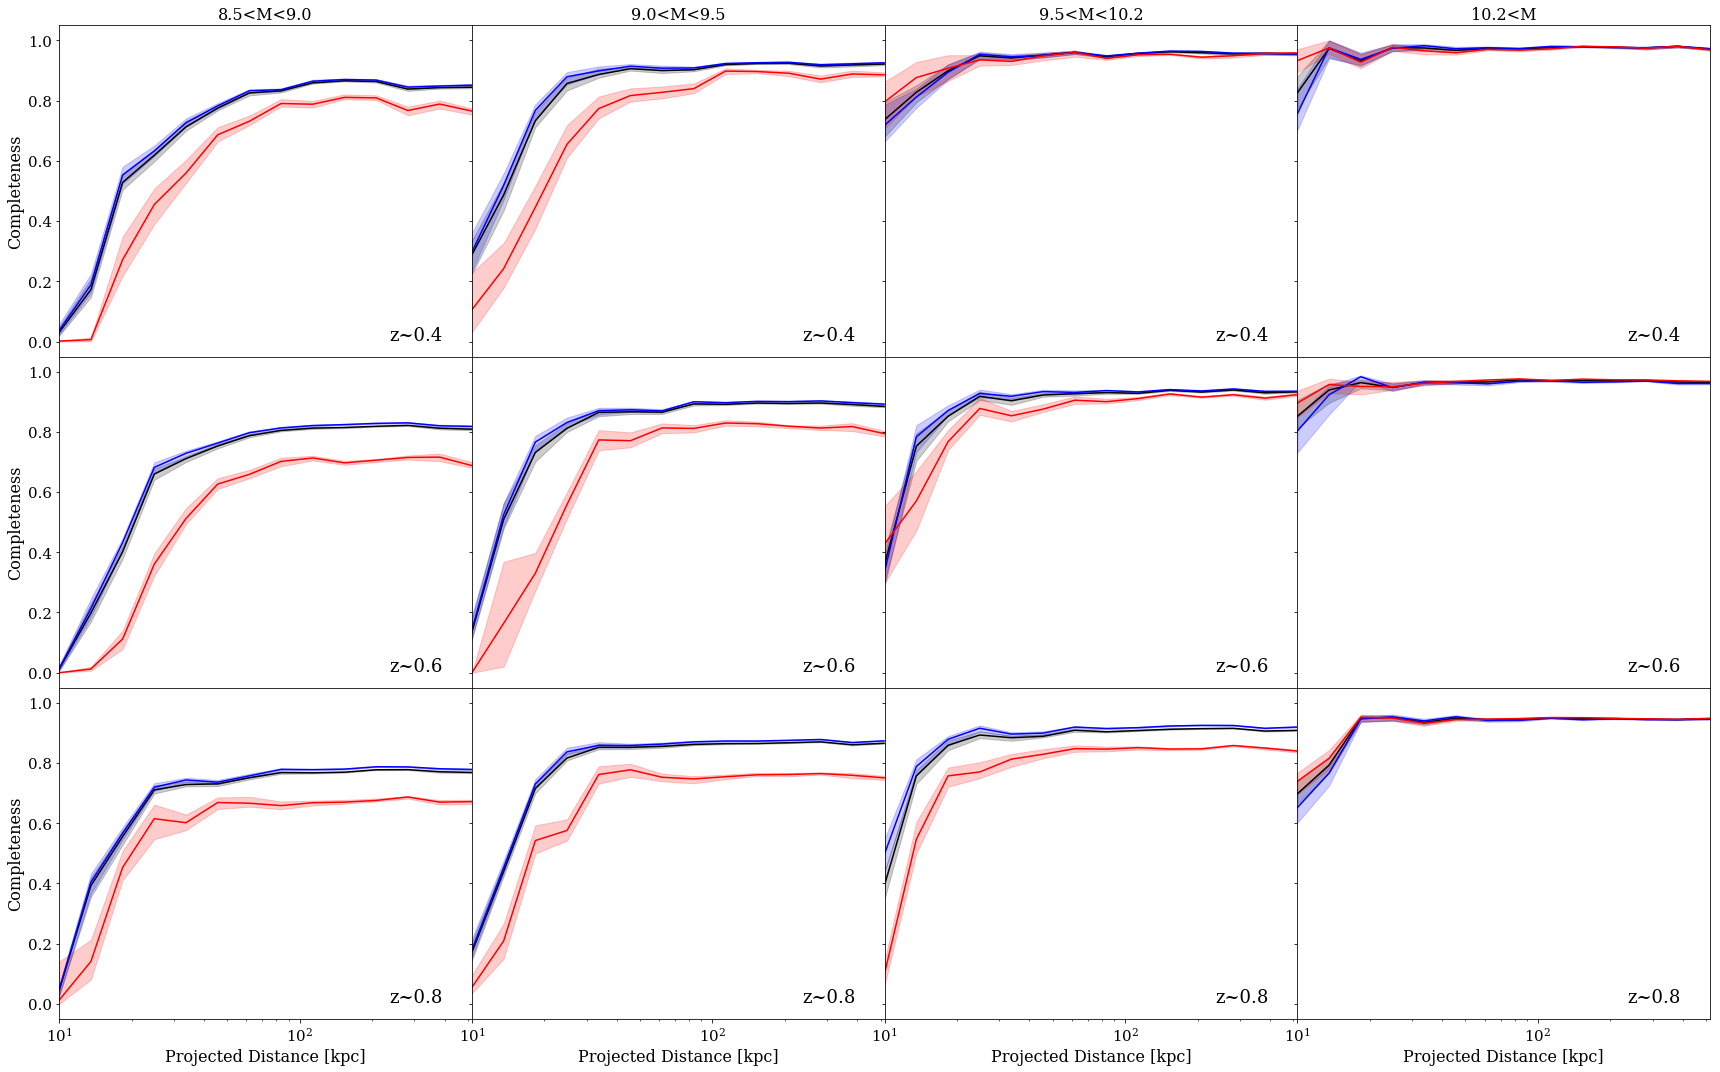

In [8]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(24,15))

mass_bins = ['8.5', '9.0', '9.5', '10.2', '13.0']
path = 'completeness_curve/curves_graham/'
bin_edges = np.load('CUT_deep_catalogs/split_host_mass/bin_edges.npy')[:-1]
for i in range(3):
    axs[i][0].set_ylabel('Completeness',fontsize=16)
    for j in range(4):
        z = 0.4 + i*0.2
        z_low = round(z-0.1,1)
        z_high = round(z+0.1,1)
        
        masscut_low = mass_bins[j]
        masscut_high = mass_bins[j+1]
        try:
            comp_all_50 = np.genfromtxt(path+'comp_bootstrap_all_all_'+masscut_low+'_'+masscut_high+'_'
                                    +str(z_low)+'_'+str(z_high)+'.txt')
            comp_sf_50 = np.genfromtxt(path+'comp_bootstrap_all_ssf_'+masscut_low+'_'+masscut_high+'_'
                                   +str(z_low)+'_'+str(z_high)+'.txt')
            comp_q_50 = np.genfromtxt(path+'comp_bootstrap_all_sq_'+masscut_low+'_'+masscut_high+'_'
                                  +str(z_low)+'_'+str(z_high)+'.txt')
        except IOError:
            comp_all_50 = np.genfromtxt(path+'comp_bootstrap_all_all_'
                                    +str(z_low)+'_'+str(z_high)+'_'+masscut_low+'_'+masscut_high+'.txt')
            comp_sf_50 = np.genfromtxt(path+'comp_bootstrap_all_ssf_'
                                   +str(z_low)+'_'+str(z_high)+'_'+masscut_low+'_'+masscut_high+'.txt')
            comp_q_50 = np.genfromtxt(path+'comp_bootstrap_all_sq_'
                                  +str(z_low)+'_'+str(z_high)+'_'+masscut_low+'_'+masscut_high+'.txt')
            
        comp_all = np.median(comp_all_50, axis=0)
        comp_all_l = np.percentile(comp_all_50,16, axis=0)
        comp_all_h = np.percentile(comp_all_50,84, axis=0)

        comp_sf = np.median(comp_sf_50, axis=0)
        comp_sf_l = np.percentile(comp_sf_50,16, axis=0)
        comp_sf_h = np.percentile(comp_sf_50,84, axis=0)

        comp_q = np.median(comp_q_50, axis=0)
        comp_q_l = np.percentile(comp_q_50,16, axis=0)
        comp_q_h = np.percentile(comp_q_50,84, axis=0)
        
        axs[i][j].plot(bin_edges,comp_all,'k',label='all')
        axs[i][j].fill_between(bin_edges,comp_all_l,comp_all_h,color='k',alpha=0.2)
        
        axs[i][j].plot(bin_edges,comp_sf,'b',label='sf')
        axs[i][j].fill_between(bin_edges,comp_sf_l,comp_sf_h,color='b',alpha=0.2)
        
        axs[i][j].plot(bin_edges,comp_q,'r',label='q')
        axs[i][j].fill_between(bin_edges,comp_q_l,comp_q_h,color='r',alpha=0.2)
        
        axs[i][j].annotate('z~'+str(round(z,1)),(0.80,0.05), fontsize=18, xycoords='axes fraction')
        axs[2][j].set_xlabel('Projected Distance [kpc]',fontsize=16)
        
axs[0][0].set_title('8.5<M<9.0',fontsize=16) 
axs[0][1].set_title('9.0<M<9.5',fontsize=16) 
axs[0][2].set_title('9.5<M<10.2',fontsize=16) 
axs[0][3].set_title('10.2<M',fontsize=16) 

axs[0][0].set_xscale('log')
axs[0][0].set_xlim([10,520])    

plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/comp_curve_mosaic.png',dpi=150)
plt.show()

## Test Bkg

In [45]:
def combine_deep_testbkg(csfq, ssfq, masscut_low, z, path, bkg_type):
    path = path
    try:
        affix = '_' + bkg_type + '_' + str(masscut_low) + '_' +str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    except IOError:
        affix = '_' + bkg_type + '_' + str(masscut_low) + '_' +str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))+'.txt'
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    
    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    
    radial_cosmos = cosmos_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_sxds = sxds_uddd[1:((len(cosmos_deep)-1)/2)+1]
    radial_elais = elais_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_xmmlss = xmmlss_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_deep = deep_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_combine = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial = np.average(radial_combine, axis=0, weights=n_combine)
    
    radial_cosmos_err = cosmos_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_sxds_err = sxds_uddd[((len(cosmos_deep)-1)/2)+1:]
    radial_elais_err = elais_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_xmmlss_err = xmmlss_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_deep_err = deep_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_combine_err = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial_err = np.sqrt(radial_cosmos_err**2*n_cosmos**2+radial_xmmlss_err**2*n_xmmlss**2+radial_elais_err**2*n_elais**2+radial_sxds_err**2*n_sxds**2+radial_deep_err**2*n_deep**2)/np.sum(n_combine)
    return (radial, radial_err)

[ 6.11470605e-09  4.82578615e-09  3.54024183e-08  5.91797022e-09
  1.85094144e-08  2.72242312e-08  3.34923923e-08  5.29983271e-08
  6.96791182e-08  4.02885391e-08 -1.64719125e-08 -1.19938403e-08
 -9.54300120e-09  1.33265486e-08]


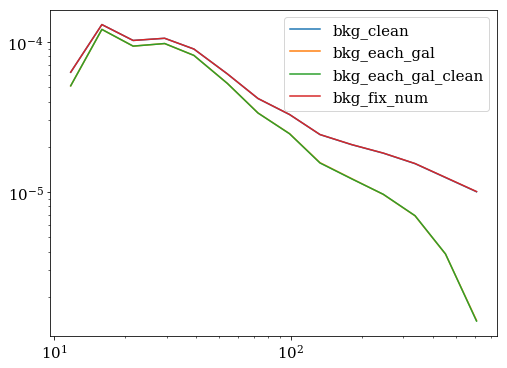

In [80]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))

path= 'CUT_deep_catalogs/test_bkg/'
radial_bkg_clean = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_clean')
radial_bkg_each_gal = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_each_gal')
radial_bkg_each_gal_clean = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_each_gal_clean')
radial_bkg_fix_num = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_fix_num')
bin_centers = np.load(path+'bin_centers.npy')

axs.plot(bin_centers, radial_bkg_clean[0],label='bkg_clean')
axs.plot(bin_centers, radial_bkg_each_gal[0],label='bkg_each_gal')
axs.plot(bin_centers, radial_bkg_each_gal_clean[0],label='bkg_each_gal_clean')
axs.plot(bin_centers, radial_bkg_fix_num[0],label='bkg_fix_num')

axs.set_yscale('log')
axs.set_xscale('log')
axs.legend(fontsize=15)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show()

In [26]:
# replace NaN values in matched catalogs
# MASS_MED, MASS_INF, MASS_SUP, Z_BEST_BC03
for keyname_pair in [('MASS_MED','MASS_MED_old'),('MASS_INF','MASS_INF_old'),('MASS_SUP','MASS_SUP_old'),('Z_BEST_BC03','zKDEPeak_old')]:
    for cat_name in ['COSMOS_deep','ELAIS_deep', 'XMM-LSS_deep', 'DEEP_deep', 'SXDS_uddd']:
        print(cat_name)
        cat_name_full = 'CUT_deep_catalogs/s16a_'+cat_name+'_masterCat_newz2.fits'
        cat = Table.read(cat_name_full)
        key1_name = keyname_pair[0] # NaN values to be replaced
        key2_name = keyname_pair[1]
        key1 = cat[key1_name]

        for i in range(len(cat)):
            if i%500000==0: print(i)
            if np.isnan(key1[i]):
                cat[i][key1_name]=cat[i][key2_name]
        cat.write(cat_name_full, overwrite=True)

COSMOS_deep
0
500000
1000000
1500000
2000000
2500000
ELAIS_deep
0
500000
1000000
XMM-LSS_deep
0
500000
1000000
DEEP_deep
0
500000
1000000
SXDS_uddd
0
500000
COSMOS_deep
0
500000
1000000
1500000
2000000
2500000
ELAIS_deep
0
500000
1000000
XMM-LSS_deep
0
500000
1000000
DEEP_deep
0
500000
1000000
SXDS_uddd
0
500000
COSMOS_deep
0
500000
1000000
1500000
2000000
2500000
ELAIS_deep
0
500000
1000000
XMM-LSS_deep
0
500000
1000000
DEEP_deep
0
500000
1000000
SXDS_uddd
0
500000
COSMOS_deep
0
500000
1000000
1500000
2000000
2500000
ELAIS_deep
0
500000
1000000
XMM-LSS_deep
0
500000
1000000
DEEP_deep
0
500000
1000000
SXDS_uddd
0
500000


In [462]:
from astropy.cosmology import WMAP9
z=0.4
d1 = WMAP9.comoving_distance(z+4.5*0.044*(1+z)).value
d2 = WMAP9.comoving_distance(z-4.5*0.044*(1+z)).value
print(d1-d2)
print(np.pi*0.7**2*(d1-d2))

1961.0981063181646
3018.87598785122


In [40]:
cat = Table.read('CUT_deep_catalogs/s16a_ELAIS_deep_masterCat_newz3.fits')
print(len(cat),len(cat[cat['matched']==True]))
cat.info()
# print(len(cat),len(cat[abs(cat['zKDEPeak_old']-cat['Z_BEST_BC03']<0.044*(1+cat['zKDEPeak_old']))]))
# print( len(cat), len(cat[abs(cat['MASS_INF']-cat['MASS_INF_old'])<1]) )

1335423 1317120
<Table masked=True length=1335423>
    name      dtype  n_bad
------------ ------- -----
      NUMBER   int64     0
          RA float64     0
         DEC float64     0
    zKDEPeak float64     0
  zKDEMedian float64     0
    MASS_MED float64     0
    MASS_INF float64     0
    MASS_SUP float64     0
preds_median float32     0
      sfProb float64     0
      inside    bool     0
 Z_BEST_BC03 float32     0
MASS_MED_new float64     0
MASS_INF_new float64     0
MASS_SUP_new float64     0
       CLASS   int64 18303
     matched    bool     0
